In [10]:
import pandas as pd
import numpy as np
from scipy.sparse import load_npz 

Reading input queries

In [2]:
queries = pd.read_csv("..\\data\\queries_samples.csv")

queries.head(4)

,query_id,text
0,156493,do goldfish grow
1,1110199,what is wifi vs bluetooth
2,1063750,why did the us volunterilay enter ww1
3,130510,definition declaratory judgment


Reading output data

In [3]:
thresh = "1.0"
data_path = f"..\\data_output\\queries_thresh_{thresh}_pos.parquet"
cw_repr_path = f"..\\data_output\\cw_thresh_{thresh}_pos.npz"

In [4]:
data_df = pd.read_parquet(data_path)
data_df["expaded_words"] = data_df.apply(lambda row: set(row.cluwords_textual_repr).difference(set(row.text)), axis=1)
data_df["n_expanded_words"] = data_df["expaded_words"].apply(len)
data_df = queries.merge(data_df, on="query_id", suffixes=("_raw", "_cw"))

In [6]:
data_df.head(5)

,query_id,text_raw,text_cw,cluwords_textual_repr,cluwords_repr,expaded_words,n_expanded_words
0,156493,do goldfish grow,"[do, goldfish, grow]","[goldfish, grow, do]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{},0
1,1110199,what is wifi vs bluetooth,"[what, is, wifi, vs, bluetooth]","[wifi, what, is, vs, bluetooth]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{},0
2,1063750,why did the us volunterilay enter ww1,"[why, did, the, us, volunterilay, enter, ww1]","[ww1, did, enter, the, us, why]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{},0
3,130510,definition declaratory judgment,"[definition, declaratory, judgment]","[definition, declaratory, judgment]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{},0
4,489204,right pelvic pain causes,"[right, pelvic, pain, causes]","[causes, pelvic, pain, right]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{},0


Check if two matrices are equal

In [13]:
cw_csr_matrix = load_npz(cw_repr_path)
cw_csr_matrix.shape

(43, 9390)

In [14]:
cw_np_matrix = np.asarray([cw for cw in data_df["cluwords_repr"].tolist()])
cw_np_matrix.shape

(43, 9390)

In [16]:
bool_answer = np.array_equal(cw_csr_matrix.todense(), cw_np_matrix)

bool_answer

True

Checking Textual information

In [52]:
data_df[["text_raw", "expaded_words"]].head(20)


,text_raw,expaded_words
0,do goldfish grow,"{bowl, pets, aquarium, carp, fishes, aquariums..."
1,what is wifi vs bluetooth,"{phones, e.g., eg, wireless, non, router, cord..."
2,why did the us volunterilay enter ww1,"{soviet, budapest, armenia, europeans, germany..."
3,definition declaratory judgment,"{analysis, clarification, parlance, perception..."
4,right pelvic pain causes,"{irritation, comfort, uncertainty, injustice, ..."
5,what are the social determinants of health,"{dietary, law, humanitarian, medicines, psycho..."
6,does legionella pneumophila cause pneumonia,"{penciclovir, peritonitis, diverticular, artem..."
7,how is the weather in jamaica,"{dublin, chinatown, elizabeth, topography, rai..."
8,types of dysarthria from cerebral palsy,"{different, vehicles, locations, sections, hem..."
9,who is robert gray,"{parker, george, leon, orange, wesley, catheri..."


Checking distribution of expandaded words

<Axes: title={'center': 'Expanded Words - Threshold: 0.5'}, xlabel='n_expanded_words', ylabel='Frequency'>

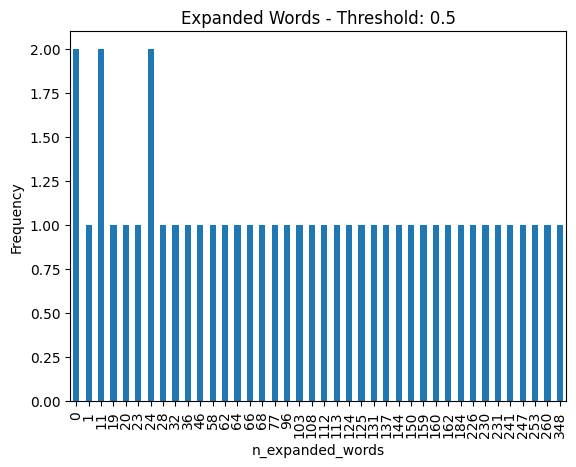

In [20]:
import matplotlib 
data_df["n_expanded_words"].value_counts().sort_index(ascending=True).plot.bar(ylabel="Frequency", title=f"Expanded Words - Threshold: {thresh}")